# Experiment Description


In [132]:
# import sys
# !{sys.executable} -m pip freeze

In [116]:
from os.path import join, isdir, basename
from os import listdir
import pandas as pd
import pickle
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import math


In [117]:
import pandas as pd
	
#load dataframe from csv
df = pd.read_csv('babyBet.csv')
df

,MEX/EU,Name,Date,Sex,EyeColor,Weight,FirstLetterOfName,Size,BabyWithHair
0,EU,Killian,26/03/2021,girl,blue,3.50,NaN,35.0,no
1,EU,Kathleen,28/03/2021,boy,brown,3.85,M,51.8,yes
2,MEX,El george,29/03/2021,girl,brown,3.30,D,50.0,yes
3,EU,KLY <3,17/03/2021,girl,blue,3.40,A,53.0,yes
4,EU,Sammy,24/03/2021,girl,brown,3.00,M,49.0,yes
5,MEX,Jorge papa,21/03/2021,girl,blue,3.60,I,52.0,yes
6,EU,Norah,25/03/2021,boy,brownGreen,3.00,P,50.0,NaN
7,MEX,Catalina,23/03/2021,girl,brown,3.30,M,52.0,yes
8,EU,Geraldine,01/04/2021,boy,blue,3.45,A,53.5,yes
9,MEX,Alicia,27/03/2021,girl,brown,3.10,K,51.5,yes


In [118]:
from collections import Counter

colors = ( "cornflowerblue", "lightcoral", "lightgreen", "navajowhite", "darkgoldenrod") 

def plot_numerical_values_as_bar(attribute, values, title, rounding_dec=1, sort=True):
    if rounding_dec > 0:
        values = [round(value,rounding_dec) for value in values]
    else:
        values = [value for value in values]
    
    if sort:
        values.sort()
    values_as_str = [str(value) for value in values]

    weight_counter = Counter(values_as_str)
    total_counter = sum(weight_counter.values())
    value_set = sorted(set(values_as_str))

    display_values = [(weight_counter[key]/total_counter)*100 for key in value_set]

    plotdata = pd.DataFrame({"counts": display_values}, index=value_set)

    plotdata.plot(kind="bar", legend=False)

    plt.title(title)
    plt.xlabel(attribute)
    plt.ylabel('Percentage')

def make_double_bar_graph(attribute, attribute_values, bar_separation=1, bar_width = 0.4, colors_param=None):
    # the width of our bars
    if colors_param is None:
        colors_param = colors
        
    nationalities = ['Mexican', 'European']
    
    mex_counter = Counter(df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist())
    total_mex = sum(mex_counter.values())
    eu_counter = Counter(df.loc[df['MEX/EU'] == 'EU'][attribute].tolist())
    total_eu = sum(eu_counter.values())
    
    attribute_counters = {}
    for attribute_value in attribute_values:
        attribute_counters[attribute_value] = [(mex_counter[attribute_value]/total_mex)*100, (eu_counter[attribute_value]/total_eu)*100]


    value_pos = {}

    for index, attribute_value in enumerate(attribute_values):
        if index == 0:
            value_pos[attribute_value] = [i*bar_separation for i, _ in enumerate(nationalities)]
        else:
            value_pos[attribute_value] = [val + bar_width for val in value_pos[attribute_values[index-1]]]
                                          
    # labels the x axis with Months
    plt.xlabel('Predictions')

    # labels the y axis with Number Potatoes
    plt.ylabel('Total Predictions')

    # changes the title of our graph
    plt.title(attribute+' Prediction Mexico vs EU')

    pos = (len(attribute_values) * bar_width)/2 - (bar_width/2)
    tick_pos = [val +  pos for val in value_pos[attribute_values[0]]]

    plt.xticks(tick_pos, nationalities)

    
    for index, attribute_value in enumerate(attribute_values):
        plt.bar(value_pos[attribute_value], attribute_counters[attribute_value], label=attribute_value, width=bar_width, color=colors_param[index])
                                          
    plt.legend()
    plt.show()

    
def plot_pie_chart(attribute, colors_param=None):
    if colors_param is None:
        colors_param = colors
    
    values = df[attribute].tolist()
    values = [value for value in values if str(value) !='nan']
    counter = Counter(values)

    fig = plt.figure(figsize =(10, 7)) 

    plt.pie(counter.values(), labels = counter.keys(), colors = colors_param) 

    # show plot 
    plt.show() 

# Baby Due Date

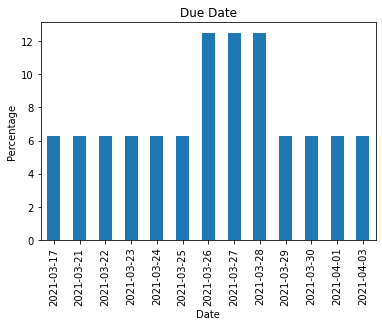

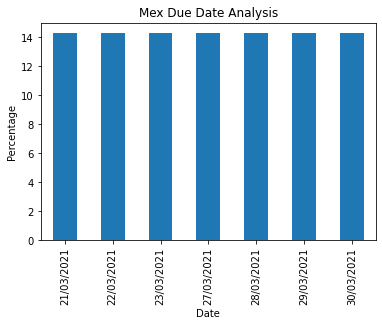

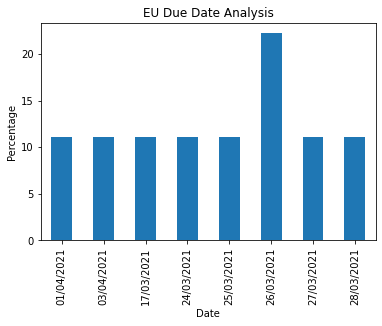

In [119]:
attribute = 'Date'
values = df[attribute].tolist()
dates = []
for value in values:
    elements = value.split('/')
    date_reversed = elements[2]+'-'+elements[1]+'-'+elements[0]
    dates.append(date_reversed)

    
plot_numerical_values_as_bar(attribute, values=dates, title='Due Date', rounding_dec=-1)

mex_values = df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=mex_values, title='Mex Due Date Analysis', rounding_dec=-1)
eu_values = df.loc[df['MEX/EU'] == 'EU'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=eu_values, title='EU Due Date Analysis', rounding_dec=-1)

# Baby Sex

* Results normalised per continent membership

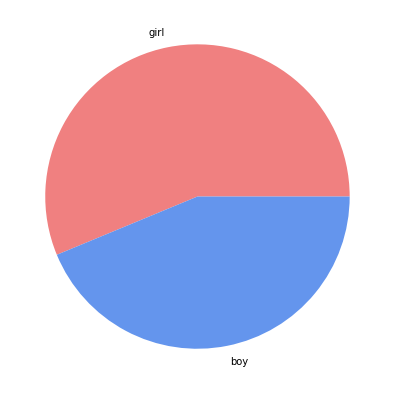

In [120]:


attribute= 'Sex'
plot_pie_chart(attribute, colors_param = ("lightcoral","cornflowerblue"))

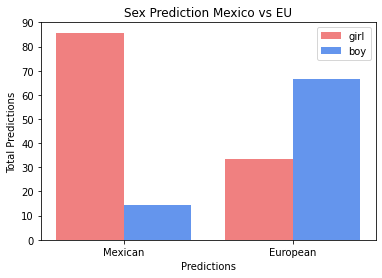

In [121]:

make_double_bar_graph(attribute='Sex',attribute_values=['girl', 'boy'], bar_separation=1, colors_param = ("lightcoral","cornflowerblue"))

In [122]:
# df_eu_sex = df.loc[df['MEX/EU'] == 'EU']
# df_eu_sex

# Baby Eye Color


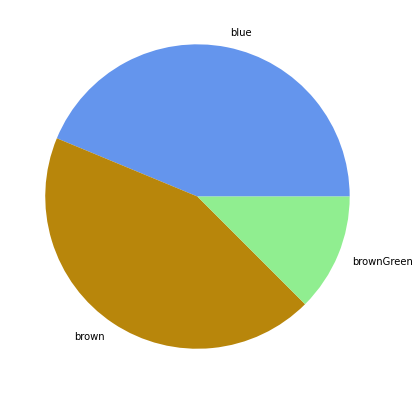

In [123]:
attribute= 'EyeColor'

plot_pie_chart(attribute, colors_param = ("cornflowerblue", "darkgoldenrod", "lightgreen"))

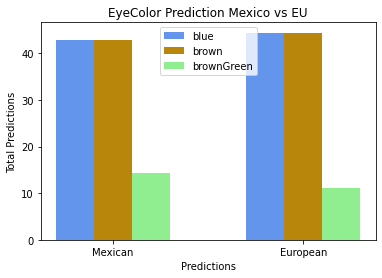

In [124]:
make_double_bar_graph(attribute='EyeColor',attribute_values=['blue', 'brown', 'brownGreen'], bar_separation=2, colors_param = ("cornflowerblue", "darkgoldenrod", "lightgreen"))

# Baby Weight

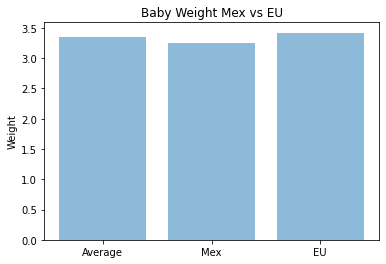

In [125]:
def average_weight(weight_list):
    counter = Counter(weight_list)
    total = 0
    for item in counter.most_common():
        total+=float(item[0])*float(item[1])


    return total/ sum(counter.values())

def plot_simple_bar(labels, values, title, y_axis):

    y_pos = np.arange(len(labels))

    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel(y_axis)
    plt.title(title)

    plt.show()

    
attribute = 'Weight'
aw_all = average_weight(df[attribute].tolist())

aw_mex = average_weight(df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist())
aw_eu = average_weight(df.loc[df['MEX/EU'] == 'EU'][attribute].tolist())

plot_simple_bar(labels=('Average', 'Mex', 'EU'), values = [aw_all, aw_mex, aw_eu], title='Baby Weight Mex vs EU', y_axis='Weight')

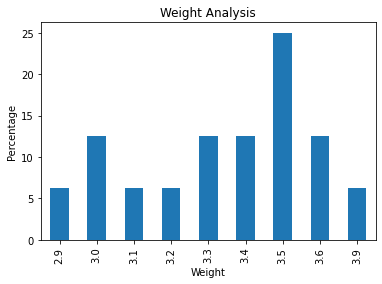

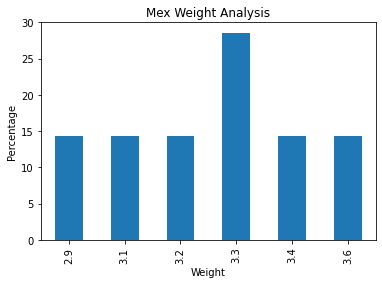

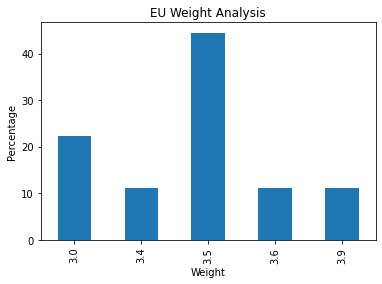

In [126]:
values = df[attribute].tolist()

plot_numerical_values_as_bar(attribute, values=values, title='Weight Analysis')

mex_values = df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=mex_values, title='Mex Weight Analysis')
eu_values = df.loc[df['MEX/EU'] == 'EU'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=eu_values, title='EU Weight Analysis')
    

# Baby Size

In [127]:
attribute = 'Size'

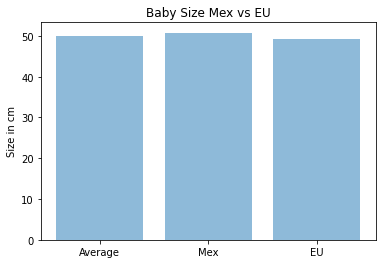

In [128]:
aw_all = average_weight(df[attribute].tolist())
aw_mex = average_weight(df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist())
aw_eu = average_weight(df.loc[df['MEX/EU'] == 'EU'][attribute].tolist())

plot_simple_bar(labels=('Average', 'Mex', 'EU'), values = [aw_all, aw_mex, aw_eu], title='Baby Size Mex vs EU', y_axis='Size in cm')

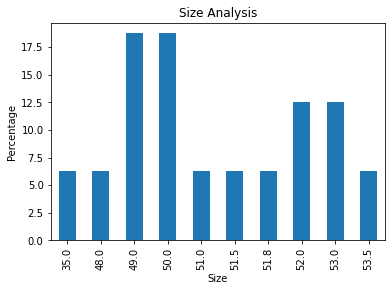

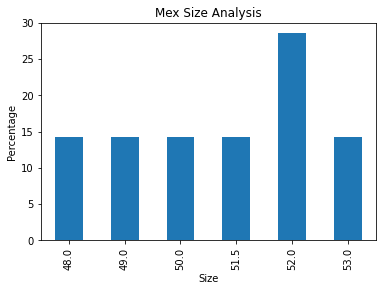

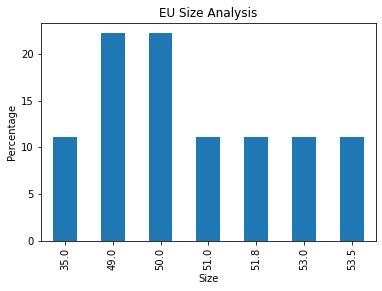

In [129]:
values = df[attribute].tolist()


plot_numerical_values_as_bar(attribute, values=values, title='Size Analysis')

mex_values = df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=mex_values, title='Mex Size Analysis')
eu_values = df.loc[df['MEX/EU'] == 'EU'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=eu_values, title='EU Size Analysis')

# Baby with Hair

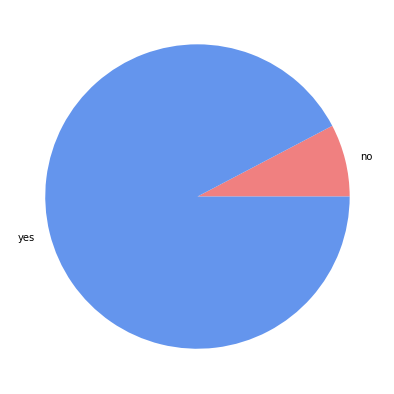

In [130]:
attribute= 'BabyWithHair'
plot_pie_chart(attribute, colors_param = ("lightcoral","cornflowerblue"))

# First Letter of Baby Name

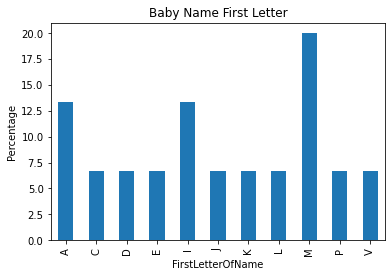

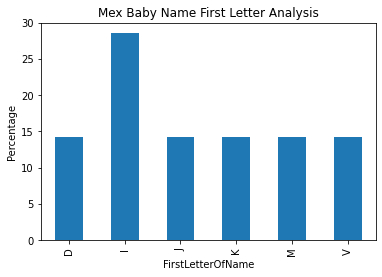

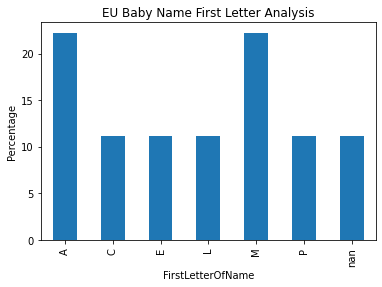

In [131]:
attribute = 'FirstLetterOfName'
values = df[attribute].tolist()

values = [value for value in values if str(value) !='nan']


    

plot_numerical_values_as_bar(attribute, values=values, title='Baby Name First Letter', rounding_dec=-1, sort=False)
mex_values = df.loc[df['MEX/EU'] == 'MEX'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=mex_values, title='Mex Baby Name First Letter Analysis', rounding_dec=-1, sort=False)
eu_values = df.loc[df['MEX/EU'] == 'EU'][attribute].tolist()
plot_numerical_values_as_bar(attribute, values=eu_values, title='EU Baby Name First Letter Analysis', rounding_dec=-1, sort=False)